# COGS 108 - Final Project - Group 38

---

# The State's Response to Shootings

### A Data Science Analysis on Law Enforcement Policy in California

# Overview

We analyzed the relationship between the amount of police-involved shootings in California and the number of law-enforcement related bills proposed in the state. We isolated police-involved shootings that occurred in California from the nationwide shootong database. We used webscraping to isolate the bills relating to law enforcement in addition to using police code and vocab datasets to detect as many bills as possible from the California bill dataset. We came to the final conclusion that there is not enough conclusive evidence to state any kind of relationship between shooting incidents and number of proposed bills. 

# Names

- Nick Fithen
- Lupe De Anda
- Andrew Lona
- Kimberly Alonzo
- Andres Villegas

<a id='research_question'></a>
# Research Question

What is the relationship between the amount of reported California police shootings and the number of law-enforcement related bills proposed in the state from 2015 to now?




<a id='background'></a>

## Background & Prior Work

**Introduction:**

As the occurrence of police-involved shootings continue to increase, the public is becoming more and more aware of them. We aim to look for a relationship between the number of law-enforcement related bills proposed in California and the number of reported police-involved shootings between 2015 to present time. We hope to construct a model that can track past shooting cases in California and find a relationship for how much the shootings compare to the amount of law-enforcement bill proposals in the state. The proposal of bills in California are actions that will certainly be present in the future as government officials are always looking for ways to improve their quality of living. The continued use of firearms in State Enforcement will provide future data of enforcement related shootings.  


**Prior Work:**

Michael Luca, Deepak Malhotra, and Christopher Poliquin 
conducted a study on the impact of mass shootings on gun policy. They found that mass shootings evoke large policy responses, specifically, a 15% increase in firearm bills inroduced.They also found that the amount of firearm bills that were actually enacted into law depended on the party in power, with a Replican controlled legislature resulting in less gun restrictions. They concluded that there was no significant effect of mass shootings on enacted laws for tighter gun restrictions. This study is relevant to our project in terms of how they analyzed and visualized the bills that were introduced.

Luca: https://www.hbs.edu/ris/Publication%20Files/16-126_ce055015-fc1c-4a8c-9a8a-8a9361d808bb.pdf 

Raheem Hosseini points out in his article, "Will California Change Policing", how current law enforcement related bills are being proposed in response to shooting involving police. Hosseini states that law enforcement groups claim that a bill that would bar officers from using chokeholds wasn't explicit enough for officers to know they can defend themselves. Hosseini includes an assembly member's response which was that the right for officers to defend themselves is clear in the state penal code so they didn't want to make the bill text redundant. This is relevant to our topic because the level of how explicit a bill's text tends to be. We will used a broad range of terms when trying to pull out the law-enforcement related bills from the database.

Hosseini: https://calmatters.org/justice/2020/08/california-police-reform-bills/ 

**Initial Research:**

- 1) Links to words associated with law enforcement. 
  - Link(s): 
  - (1) https://policeteststudyguide.com/top-50-police-vocabulary-you-need-to-know/ 
  - (2) https://policecodes.net/
- 2) An up-to-date catalog of all reported police-related shootings in the US from Jan 2, 2015. Information contains names of victims, their location by coordinates, city and state, whether they were armed, victim's age, gender, and race, as well as threat level.
  - Link: https://github.com/washingtonpost/data-police-shootings
- 3) A dataframe of all currently proposed and in-progress bills within the California legislature organized by bill number. It contains the title of the bill, bill number, name of the main author, and progress.
  - Link: https://leginfo.legislature.ca.gov/faces/billSearchClient.xhtml

# Hypothesis


We hypothesize that there is a positive relationship between the amount of statewide shootings in California and the number of law-enforcement related bills proposed within the state. 

We believe we will find a positive relationship because, as the public becomes more aware of police-involved shootings, bills for law enforcement reform should become introduced more frequently as a response.

# Dataset(s)

**df_vocab**
- Dataset Name: Top 50 Police Vocabulary
- Gained access to dataset via: https://policeteststudyguide.com/top-50-police-vocabulary-you-need-to-know/
- Number of observations: 50

The dataset takes 50 words that are used and understood by professionals in the police force. We additionally added the definitions of each word in a separate column. 

**df_codes**
- Dataset Name: Popular Police Codes
- Gained access to dataset via: https://policecodes.net
- Number of observations: 30

The dataset takes 30 police codes that officers used to communicate emergencies, crimes, and situations on the job. We included the descriptions of each code in a separate column.

**df_shootings**
- Dataset Name: Fatal Police Shootings Data
- Gained access to dataset via: https://github.com/washingtonpost/data-police-shootings
- Number of observations: 6,241

The dataset monitors all reported police shootings across the United States since 2015. Columns in the dataset document how the person was shot and describe the victim and events leading up to the incident.

**df_bills***
- Dataset Name: California Legislative Information
- Gained access to dataset via: https://leginfo.legislature.ca.gov/faces/billSearchClient.xhtml 
- Number of observations: 1811

The dataset includes the measure, subject, author, and status of bills proposed in the state of California. The dataset comes from the official California Legislative Information government website.

# Setup

In [ ]:
#importing basic programs + explanations of each import
import pandas as pd # needed to create and modify dataframes from the data we collect (and hopefully merge them together)

import seaborn as sns # needed to quickly graph data for visual inspection (such as for outliers)
import matplotlib.pyplot as plt # important for creating specific visualizations
import numpy as np # useful for array manipulations

from bs4 import BeautifulSoup # Beautiful Soup library used for web scraping
import requests # needed to communicate with the html file

# Data Cleaning

In [ ]:
#reading in dataframes for cleaning

df_vocab = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/vocab.csv')
df_codes = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/codes.csv')
df_bills = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/bills.csv')
df_shootings = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/shootings.csv')

#df_vocab and df_codes are already in a good clean format - only have 2 columns, words and defns
#df_shootings still needs to be cleaned

In [ ]:
#dropping names of victims for privacy
df_shootings = df_shootings.drop(labels='name',axis=1)

#dropping columns we dont need to answer our question 
df_shootings = df_shootings.drop(labels=['latitude','longitude','is_geocoding_exact','signs_of_mental_illness','threat_level','flee','body_camera'],axis=1)

In [ ]:
#narrowing down data to only include CA
df_shootings = df_shootings[df_shootings['state']=='CA']

#converting to datetime and creating month and year columns
df_shootings.loc[:,'date'] = pd.to_datetime(df_shootings['date'])
df_shootings['month'] = df_shootings['date'].dt.month
df_shootings['year'] = df_shootings['date'].dt.year
df_shootings.head(3)

,Unnamed: 0,id,date,manner_of_death,armed,age,gender,race,city,state,date_homogenized,month,year
3,3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,20150104,1,2015
10,10,19,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,20150106,1,2015
22,22,43,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,20150111,1,2015


In [ ]:
#dataframes of shootings sorted by year 
shootings_2015 = df_shootings[df_shootings['year']==2015]
shootings_2016 = df_shootings[df_shootings['year']==2016]
shootings_2017 = df_shootings[df_shootings['year']==2017]
shootings_2018 = df_shootings[df_shootings['year']==2018]
shootings_2019 = df_shootings[df_shootings['year']==2019]
shootings_2020 = df_shootings[df_shootings['year']==2020]
shootings_2021 = df_shootings[df_shootings['year']==2021]

In [ ]:
#dataframes of shootings per month regardless of year
shootings_jan_all = df_shootings[df_shootings['month']==1]
shootings_feb_all = df_shootings[df_shootings['month']==2]
shootings_mar_all = df_shootings[df_shootings['month']==3]
shootings_apr_all = df_shootings[df_shootings['month']==4]
shootings_may_all = df_shootings[df_shootings['month']==5]
shootings_jun_all = df_shootings[df_shootings['month']==6]
shootings_jul_all = df_shootings[df_shootings['month']==7]
shootings_aug_all = df_shootings[df_shootings['month']==8]
shootings_sep_all = df_shootings[df_shootings['month']==9]
shootings_oct_all = df_shootings[df_shootings['month']==10]
shootings_nov_all = df_shootings[df_shootings['month']==11]
shootings_dec_all = df_shootings[df_shootings['month']==12]

In [ ]:
#to access a specific month of a specific year we can use: 
#variable_name = shootings_xxxx[shootings_xxxx['month' == y]] 
#where xxxx is year as an integer and y is the month as an integer

#uncomment to run example:
#jan_2020 = shootings_2020[shootings_2020['month']==1]
#jan_2020

# Data Analysis & Results

#Structure

Our data is spread across 4 different dataframes (`df_codes`, `df_vocab`, `df_shootings`, and `df_bills`), all of which are in tabular format. Each observation (word in `df_codes` and `df_vocab`, incident in `df_shootings`, and bill in `df_bills`) has an independent row.


The information we have for each set includes:
- `df_shootings`: personal identifiers,	date of incident,	manner of death,	whether the victim was armed (and, if so, what they armed with),	their age,	gender,	and race,	the city and	state it took place in, and the	month and	year (extracted from date to help with indexing)
- `df_codes` and `df_vocab`: words associated with police enforcement, specifically radio codes and 'important vocab each police officer should know', along with their definitions
- `df_bills`: ID # of the bill, ID of the session, number of the bill proposed (series of letters, number), status of the bill (based on a 1-5 scale, where each number represents a stage in the process), current decision made on the bill, date the bill status was decided, bill title, desctiption of the bill, ID of the committee, date that last time there was action with the bill, desctiption of the actions taken, url for the bill, state link.


> `Type` of information in each column:

- all columns except for date of incident, month, and	year within `df_shootings` are strings; date of incident, month, and	year are integers converted from initial datetime objects
- all columns in `df_codes` and `df_vocab` are strings
- bill number, status description, title, description, comittee, last action, and provided links in `df_bills` are stored as strings, everything else is stored as an integer (bill and session id, status, status date, comittee id, and last action date)


#Granularity

> What is represented in each row:

- `df_shootings`: An individual instance in which someone died to a police related shooting. Additional variables in the row describe the specifics of the shooting (time, reason for shooting, date, etc.)
-`df_codes` and `df_vocab`: A common word/code that is understood and used in the police force. The additional definition provides a description for that word or the situation for the code.
-`df_bills`: An individual bill that was proposed. Additional variables found in the column also describe specifics of the bill (dates, people that introduced it, purpose of the bill, current status, etc.)

These are all shown to be the same level of granularity. Each column focuses one thing and includes specific information about it, whether it is a victim, bill, word/code.

> Aggregations and data metric(s) used for summarization

It is hard to have outliers for a recorded shooting or a bill that is proposed so we will be using mean to describe variables within our data.  

#Scope

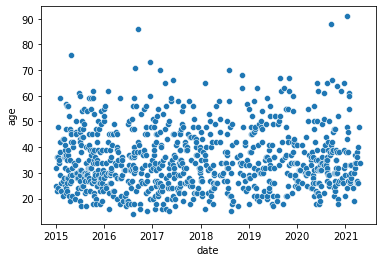

In [ ]:
#First visualization is a scatter plot of ages of people that were killed each year.
sns.scatterplot(data=df_shootings, x='date', y='age') 

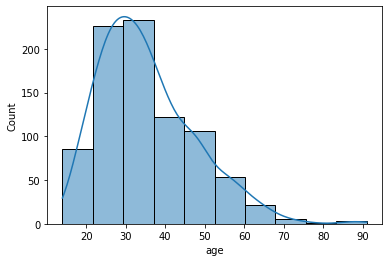

In [ ]:
#second visualization 
sns.histplot(df_shootings['age'], bins=10, kde=True)

[Text(0.5, 1.0, 'Number of CA Shootings per Year')]

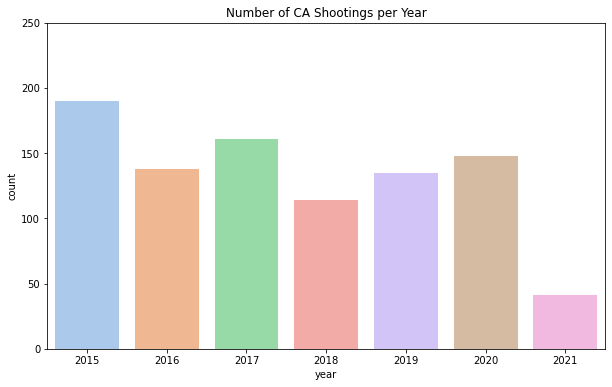

In [ ]:
#visualization for shootings in California for every year (something happend with my original graph so aI am redoing it)-Nick
#making the plot much bigger to see
plt.figure(figsize= (10,6))
cpshooty= sns.countplot(x= df_shootings['year'], data= df_shootings, palette= 'pastel' ).set(title= 'Number of CA Shootings per Year')
#increasing the y-axis
plt.ylim(0, 250)
cpshooty

#Temporality

> Dates in dataframes

-status description, last action columns in `df_bills`: dates that correspond to the status description of each bill, dates for the last actions made for each bill.
-date column in `df_shootings`: date of incident for each police shooting reported


>Date formating

- The status desciption and last action made columns in `df_bills` are dated using a YYYY-MM-DD format. They have been converted from datetime to an integer format (8 digits per date).
-In `df_shootings`, the date column is in a YYYY-MM-DD format along with additional columns for individual months (labeled 1-12) and individual year (labeled YYYY). The regular dates have been converted from datetime to an integer format (8 digits per date).

- Null timestamps are represented with "NaN" 

>Aggregations/summarizations

- Pulled all of the bills that can be categorized as law enforcement.
- Ploted the amount of shootings per year against the amount of bills proposed in California to see if there is any relationship.

#Faithfulness

- The values for bills are resonable as we have removed any older dated bills from years that we do not have shooting data for.

- Each row of each initial table is an individual case, so there is no possibility for an instance of inconsistencies between tables, since no data is ever repeated. Any merging done was with data we knew was consistent.

- `df_codes` and `df_vocab` were transfered over from a webpage to an excel spreadsheet, then converted to CSVs by hand. Inconsistencies were dealt with by copying and pasting longer definitions and cross checking once the transfer had finished.

- There are no obvious signs of falsification in our data.

# Ethics & Privacy


- The names of shooting victims have been dropped from the original dataset in order to maintain privacy. The original dataset provided ID numbers to each row which allowed us to immediately drop names so no analysis or code was conducted with names.
- Data that occured outside of California were dropped so as to not influence our analysis or be used to make inferences to the entire U.S., given that our bills dataset only gives information pertaining to California.

- The database for police shootings states that there are 301 shootings that are unaccounted for due to unverified locations, which creates a bias because of the missing information. FBI and CDC officials acknowledge that while they attempt to log all instances of fatal shootings by police, their data is incomplete. We must also, then, acknowledge that the dataset we are working with is not a complete and comprehensive set and be mindful of this while conducting analysis.

- When using webscraping to isolate the bills relating to law enforcement, the bills containing vague or misleading language could be left undetected. To prevent this, we will use a broad list of law enforcement terms to detect as many bills as possible.

- Our results could be used to draw conclusions about the impact that law enforcement has on politics, as well as whether those people proposing said bills care about the regulation of policing. Because of this we would like to explicitly state that *we are merely analyzing trends and correlation rather than intent, causality, or explanation*. We recognize that  relationships between fatal police shootings and California/U.S. politics is complex and requires further in-depth analysis that considers more variables in order to make a statement about it. In order to discourage the use of our data as independent proof of any statement, we will include disclaimers on data visualizations as we deem fit and take into consideration the wording in our project, specifically within the conclusion and discussion, making sure that this stance is as clear as can be.

# Conclusion & Discussion

Through the information we gathered, we came to the final conclusion that there is not enough conclusive evidence to state any kind of relationship between shooting incidents and number of proposed bills. 

# Team Contributions

- Nick - notebook organization and editing, writing code
- Lupe - initial data cleaning, notebook organization and editing
- Andrew - web scraping, data visualizations
- Kimberly - notebook organization and editing
- Andres - 